In [ ]:
import pandas as pd
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline

Baca Data

In [ ]:
tweet = pd.read_csv('Hasil Preprocessing 2.csv')

In [ ]:
tweet

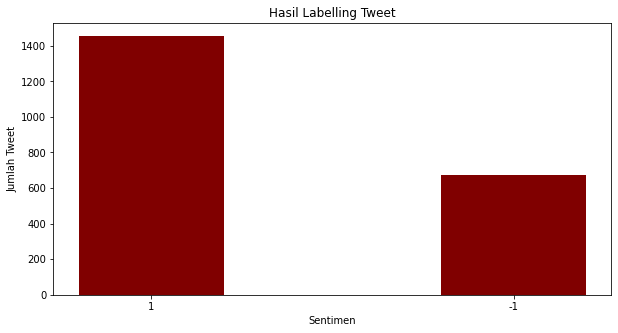

In [ ]:
a = '1', '-1'
b = tweet['Label'].value_counts()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(a, b, color ='maroon',
		width = 0.4)

plt.xlabel("Sentimen")
plt.ylabel("Jumlah Tweet")
plt.title("Hasil Labelling Tweet")
plt.show()

In [ ]:
tweet['Label'].value_counts()

 1    1455
-1     671
Name: Label, dtype: int64

Pembagian Data 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = tweet['Data']  
y = tweet['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Pembagian Data Menggunakan K-Fold

In [ ]:
from sklearn.model_selection import KFold # import KFold

In [ ]:
X = tweet['Data'] # create an array
y = tweet['Label'] # Create another array

In [ ]:
kf = KFold(n_splits=11, random_state=7, shuffle=True) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=11, random_state=7, shuffle=True)


In [ ]:
for train_index, test_index in kf.split(X):
 print('Train:', train_index, 'Test:', test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

Ekstrasi Fitur TF-IDF

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(y_train)
Test_Y = Encoder.fit_transform(y_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=700)
Tfidf_vect.fit(tweet['Data'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [ ]:
print(Tfidf_vect.vocabulary_)

{'malas': 376, 'banget': 58, 'semangat': 559, 'sekolah': 553, 'kerja': 307, 'kuliah': 329, 'skripsi': 587, 'takut': 615, 'semenjak': 561, 'seram': 569, 'tidak': 636, 'tahu': 613, 'habis': 205, 'minggu': 409, 'tiba': 635, 'pikir': 494, 'uji': 664, 'gosok': 201, 'baju': 56, 'malam': 375, 'bisa': 94, 'bangun': 61, 'nonton': 449, 'libur': 353, 'sebentar': 547, 'teman': 625, 'nya': 453, 'jalan': 257, 'masuk': 390, 'alhamdulillah': 16, 'syukur': 610, 'selagi': 554, 'keluh': 299, 'orang': 467, 'putus': 510, 'selasa': 556, 'pesan': 493, 'jam': 259, 'beli': 78, 'sih': 581, 'deh': 143, 'iya': 249, 'allah': 18, 'rajin': 512, 'giat': 196, 'tangis': 621, 'pergi': 490, 'henti': 217, 'hati': 215, 'hancur': 210, 'depan': 145, 'jujur': 270, 'mah': 370, 'tatap': 623, 'muka': 419, 'biasa': 89, 'online': 466, 'bikin': 91, 'oh': 460, 'jaman': 260, 'tk': 643, 'beban': 72, 'ku': 326, 'selamat': 555, 'tidur': 637, 'nyenyak': 456, 'anak': 26, 'sayang': 545, 'ulang': 665, 'uang': 660, 'tuhan': 652, 'lambat': 34

In [ ]:
print(Train_X_Tfidf)

In [ ]:
print(Test_X_Tfidf)

Model SVM

In [ ]:
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import KFold # import KFold

In [ ]:
kf = KFold(n_splits=10, random_state=None, shuffle=False) # Define the split - into 2 folds 
#kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=10, random_state=None, shuffle=False)


In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

In [ ]:
for train_index, validasi_index in kf.split(Train_X_Tfidf):
  #print('Train:', train_index, 'Validasi:', test_index)
  x_train, x_validasi, y_train, y_validasi = Train_X_Tfidf[train_index], Train_X_Tfidf[validasi_index], Train_Y[train_index], Train_Y[validasi_index]
  model = SVC(C= 6.5, kernel='rbf', gamma=0.03)
  model.fit(Train_X_Tfidf,Train_Y)
  predicted_labels_train = model.predict(x_validasi)
  predicted_labels_test = model.predict(Test_X_Tfidf)
  
print("Training")
print("Confusion Matrix: ")
print(confusion_matrix(y_validasi, predicted_labels_train))
print()
print("Classifiction Report :")
print(classification_report(y_validasi, predicted_labels_train))
  
print()
print("Testing")
print("Confusion Matrix: ")
print(confusion_matrix(Test_Y, predicted_labels_test))
print()
print("Classifiction Report :")
print(classification_report(Test_Y, predicted_labels_test))


Training
Confusion Matrix: 
[[ 19  28]
 [  3 120]]

Classifiction Report :
              precision    recall  f1-score   support

           0       0.86      0.40      0.55        47
           1       0.81      0.98      0.89       123

    accuracy                           0.82       170
   macro avg       0.84      0.69      0.72       170
weighted avg       0.83      0.82      0.79       170


Testing
Confusion Matrix: 
[[ 42  97]
 [  5 282]]

Classifiction Report :
              precision    recall  f1-score   support

           0       0.89      0.30      0.45       139
           1       0.74      0.98      0.85       287

    accuracy                           0.76       426
   macro avg       0.82      0.64      0.65       426
weighted avg       0.79      0.76      0.72       426



Pake 70:30 : SVM Accuracy Score ->  76.62538699690403

Pake 80:20 : SVM Accuracy Score ->  75.63805104408353

# Grid Search
Set parameter for SVM
gamma = [0.1, 0.01, 0.001, 0.0001]
C = [ 1, 10, 100, 1000 ]
kernel = Linear

In [ ]:
param_grid = {'C':(1, 1.4, 2, 2.6), 'gamma':(0.1, 0.01, 0.001)}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svc = SVC()

In [ ]:
grid_search = GridSearchCV(svc, param_grid, cv=10, verbose=10)

In [ ]:
grid_search.fit(Train_X_Tfidf,Train_Y)

In [ ]:
grid_search.best_params_

{'C': 2.6, 'gamma': 0.1}

TF-IDF bekerja dengan mencocokan
-bikin notes hasil pekerjaan

# Model SVM-PSO

In [ ]:
import random
import math
from math import log

In [ ]:
W = 0.5
c1 = 3
c2 = 1

n_iterations = int(input("Inform the number of iterations: "))
n_particles = int(input("Inform the number of particles: "))

Inform the number of iterations: 10
Inform the number of particles: 5


In [ ]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
def fitness_function(position):
  for train_index, validasi_index in kf.split(Train_X_Tfidf):
    #print('Train:', train_index, 'Validasi:', test_index)
    x_train, x_validasi, y_train, y_validasi = Train_X_Tfidf[train_index], Train_X_Tfidf[validasi_index], Train_Y[train_index], Train_Y[validasi_index]
    model = SVC(kernel='rbf', gamma=position[0], C=position[1])
    model.fit(Train_X_Tfidf,Train_Y)
    predicted_labels_train = model.predict(x_validasi)
    predicted_labels_test = model.predict(Test_X_Tfidf)
    return confusion_matrix(y_validasi,predicted_labels_train)[0][1] + confusion_matrix(y_validasi,predicted_labels_train)[1][0], confusion_matrix(y_test,predicted_labels_test)[0][1] + confusion_matrix(y_test,predicted_labels_test)[1][0]

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.1)
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.axis([0,10,0,10])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

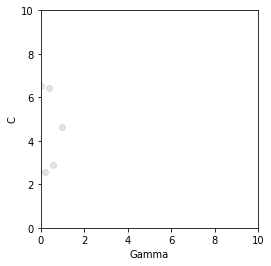

error of particle- 1 is (training, test) (8, 72)  At (gamma, c):  [0.53908156 2.89196444]
error of particle- 2 is (training, test) (29, 49)  At (gamma, c):  [0.03003691 6.53635754]
error of particle- 3 is (training, test) (20, 65)  At (gamma, c):  [0.2100087  2.57276975]
error of particle- 4 is (training, test) (3, 78)  At (gamma, c):  [0.39719826 6.41578154]


error of particle- 5 is (training, test) (2, 75)  At (gamma, c):  [0.98881121 4.6153301 ]


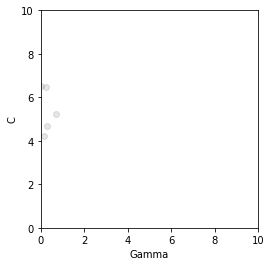

error of particle- 1 is (training, test) (10, 72)  At (gamma, c):  [0.28644983 4.7006257 ]
error of particle- 2 is (training, test) (29, 49)  At (gamma, c):  [0.03003691 6.53635754]
error of particle- 3 is (training, test) (18, 66)  At (gamma, c):  [0.13424933 4.24124744]
error of particle- 4 is (training, test) (10, 75)  At (gamma, c):  [0.22876985 6.47109353]


error of particle- 5 is (training, test) (2, 79)  At (gamma, c):  [0.67508884 5.24391316]


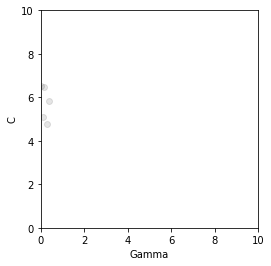

error of particle- 1 is (training, test) (10, 72)  At (gamma, c):  [0.27777909 4.76270192]
error of particle- 2 is (training, test) (29, 49)  At (gamma, c):  [0.03003691 6.53635754]
error of particle- 3 is (training, test) (23, 67)  At (gamma, c):  [0.09449168 5.11684542]
error of particle- 4 is (training, test) (16, 72)  At (gamma, c):  [0.1618074  6.49308403]


error of particle- 5 is (training, test) (6, 78)  At (gamma, c):  [0.38637145 5.82239553]


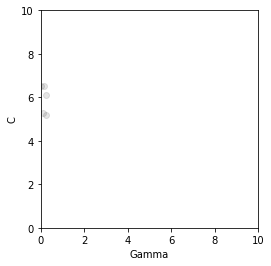

error of particle- 1 is (training, test) (13, 72)  At (gamma, c):  [0.21653098 5.2011943 ]
error of particle- 2 is (training, test) (29, 49)  At (gamma, c):  [0.03003691 6.53635754]
error of particle- 3 is (training, test) (23, 66)  At (gamma, c):  [0.0863694  5.29572536]
error of particle- 4 is (training, test) (17, 72)  At (gamma, c):  [0.14578255 6.4983466 ]


error of particle- 5 is (training, test) (10, 75)  At (gamma, c):  [0.24924768 6.09714061]


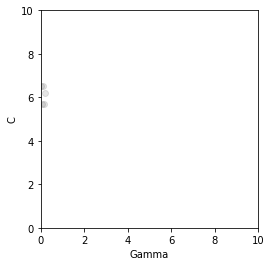

error of particle- 1 is (training, test) (17, 71)  At (gamma, c):  [0.14660506 5.70181351]
error of particle- 2 is (training, test) (29, 49)  At (gamma, c):  [0.03003691 6.53635754]
error of particle- 3 is (training, test) (25, 63)  At (gamma, c):  [0.06819135 5.69606763]
error of particle- 4 is (training, test) (18, 68)  At (gamma, c):  [0.09585786 6.5147419 ]


error of particle- 5 is (training, test) (13, 72)  At (gamma, c):  [0.19225086 6.21134106]


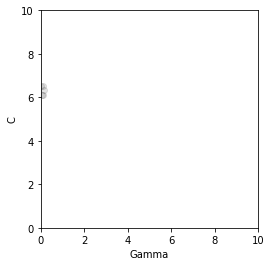

error of particle- 1 is (training, test) (19, 66)  At (gamma, c):  [0.09197708 6.09291053]
error of particle- 2 is (training, test) (29, 49)  At (gamma, c):  [0.03003691 6.53635754]
error of particle- 3 is (training, test) (27, 58)  At (gamma, c):  [0.05040117 6.08786754]
error of particle- 4 is (training, test) (19, 67)  At (gamma, c):  [0.08744598 6.51750437]


error of particle- 5 is (training, test) (17, 71)  At (gamma, c):  [0.13750545 6.32103052]


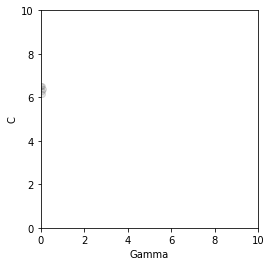

error of particle- 1 is (training, test) (23, 65)  At (gamma, c):  [0.0663335  6.27650008]
error of particle- 2 is (training, test) (29, 49)  At (gamma, c):  [0.03003691 6.53635754]
error of particle- 3 is (training, test) (25, 56)  At (gamma, c):  [0.04822897 6.13570689]
error of particle- 4 is (training, test) (22, 67)  At (gamma, c):  [0.07505315 6.52157418]


error of particle- 5 is (training, test) (17, 68)  At (gamma, c):  [0.10418855 6.38778521]


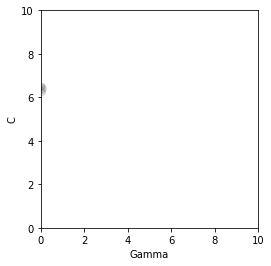

error of particle- 1 is (training, test) (24, 61)  At (gamma, c):  [0.05943427 6.32589361]
error of particle- 2 is (training, test) (29, 49)  At (gamma, c):  [0.03003691 6.53635754]
error of particle- 3 is (training, test) (24, 55)  At (gamma, c):  [0.04237283 6.26467875]
error of particle- 4 is (training, test) (24, 66)  At (gamma, c):  [0.06665262 6.52433292]


error of particle- 5 is (training, test) (21, 67)  At (gamma, c):  [0.07744786 6.44136361]


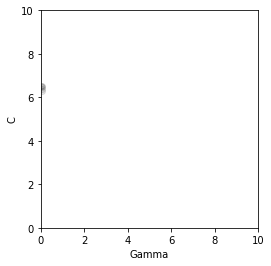

error of particle- 1 is (training, test) (24, 59)  At (gamma, c):  [0.05166203 6.38153725]
error of particle- 2 is (training, test) (29, 49)  At (gamma, c):  [0.03003691 6.53635754]
error of particle- 3 is (training, test) (24, 54)  At (gamma, c):  [0.04030896 6.31013213]
error of particle- 4 is (training, test) (24, 61)  At (gamma, c):  [0.05653205 6.52765652]


error of particle- 5 is (training, test) (24, 66)  At (gamma, c):  [0.06816103 6.45997096]


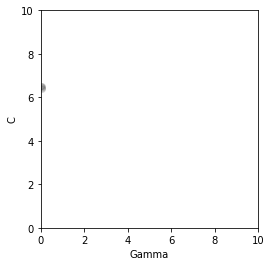

error of particle- 1 is (training, test) (24, 56)  At (gamma, c):  [0.04479171 6.43072382]
error of particle- 2 is (training, test) (29, 49)  At (gamma, c):  [0.03003691 6.53635754]
error of particle- 3 is (training, test) (26, 51)  At (gamma, c):  [0.03608102 6.40324576]
error of particle- 4 is (training, test) (25, 56)  At (gamma, c):  [0.04526617 6.53135624]
error of particle- 5 is (training, test) (24, 60)  At (gamma, c):  [0.05247166 6.49140663]
The best position is  [0.03003691 6.53635754] in iteration number 10 with error rate (train, test): (29, 49)


In [ ]:
random.seed(30)
particle_position_vector = np.array([np.array([random.random(), random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = np.array([float('inf'), float('inf')])
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    plot(particle_position_vector)
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print("error of particle-",i+1,"is (training, test)", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i])

        
        if(pbest_fitness_value[i] > fitness_cadidate[1]):
            pbest_fitness_value[i] = fitness_cadidate[1]
            pbest_position[i] = particle_position_vector[i]
            
            if(gbest_fitness_value[1] > fitness_cadidate[1]):
              gbest_fitness_value = fitness_cadidate
              gbest_position = particle_position_vector[i]
              
              if(gbest_fitness_value[1] == fitness_cadidate[1] and gbest_fitness_value[0] > fitness_cadidate[0]):
                gbest_fitness_value = fitness_cadidate
                gbest_position = particle_position_vector[i]
                

    for i in range(n_particles):
        #max_velocity = np.array([1,10])
        #min_velocity = np.array([-1,-100])
        #max_position = np.array([1,10])
        #min_position = np.array([0.01, 0.1])
        new_velocity = W*(velocity_vector[i] + ((c1*random.random()) * (pbest_position[i] - particle_position_vector[i])) + 
                          ((c2*random.random()) * (gbest_position - particle_position_vector[i])))
        
        #for j in range(0,len(new_velocity)):
            #if(new_velocity[j] > max_velocity[j]):
                #new_velocity[j] = max_velocity[j]
            #elif(new_velocity[j] < min_velocity[j]):
                #new_velocity[j] = min_velocity[j]
            
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
        
        #for j in range(0,2):
            #if(particle_position_vector[i][j] > max_position[j]):
                ##particle_position_vector[i][j] = max_position[j]
            #elif(particle_position_vector[i][j] < min_position[j]):
                #particle_position_vector[i][j] = min_position[j]

    iteration = iteration + 1
print("The best position is ", gbest_position, "in iteration number", iteration, "with error rate (train, test):", fitness_function(gbest_position))

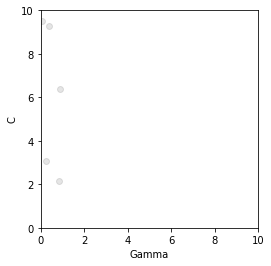

error of particle- 1 is (training, test) (7, 78)  At (gamma, c):  [0.3769623  9.26788508]
error of particle- 2 is (training, test) (7, 71)  At (gamma, c):  [0.84344674 2.1404577 ]
error of particle- 3 is (training, test) (7, 75)  At (gamma, c):  [0.87170811 6.36461746]
error of particle- 4 is (training, test) (33, 64)  At (gamma, c):  [0.04239213 9.5297206 ]


error of particle- 5 is (training, test) (25, 68)  At (gamma, c):  [0.25568367 3.0590098 ]


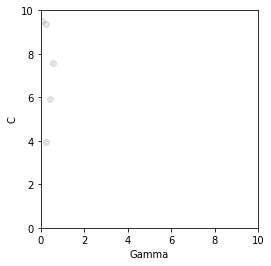

error of particle- 1 is (training, test) (14, 74)  At (gamma, c):  [0.22928787 9.38345548]
error of particle- 2 is (training, test) (7, 75)  At (gamma, c):  [0.43089722 5.94598705]
error of particle- 3 is (training, test) (7, 77)  At (gamma, c):  [0.55305233 7.58077444]
error of particle- 4 is (training, test) (33, 64)  At (gamma, c):  [0.04239213 9.5297206 ]


error of particle- 5 is (training, test) (24, 71)  At (gamma, c):  [0.22673913 3.93711171]


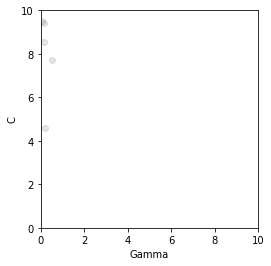

error of particle- 1 is (training, test) (22, 74)  At (gamma, c):  [0.16349201 9.4349475 ]
error of particle- 2 is (training, test) (23, 75)  At (gamma, c):  [0.14735461 8.56150275]
error of particle- 3 is (training, test) (7, 76)  At (gamma, c):  [0.51543233 7.72435202]
error of particle- 4 is (training, test) (33, 64)  At (gamma, c):  [0.04239213 9.5297206 ]


error of particle- 5 is (training, test) (24, 73)  At (gamma, c):  [0.20448857 4.61213608]


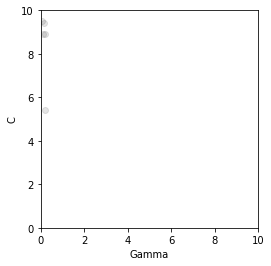

error of particle- 1 is (training, test) (22, 74)  At (gamma, c):  [0.15710068 9.43994938]
error of particle- 2 is (training, test) (26, 74)  At (gamma, c):  [0.10681853 8.93542448]
error of particle- 3 is (training, test) (15, 74)  At (gamma, c):  [0.20494253 8.90934334]
error of particle- 4 is (training, test) (33, 64)  At (gamma, c):  [0.04239213 9.5297206 ]


error of particle- 5 is (training, test) (24, 73)  At (gamma, c):  [0.17764351 5.4265453 ]


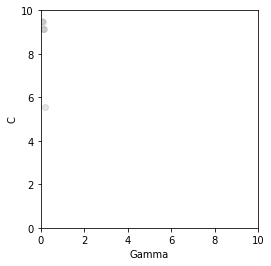

error of particle- 1 is (training, test) (24, 74)  At (gamma, c):  [0.108959   9.47762519]
error of particle- 2 is (training, test) (27, 72)  At (gamma, c):  [0.08294198 9.15567174]
error of particle- 3 is (training, test) (22, 75)  At (gamma, c):  [0.14609051 9.13395339]
error of particle- 4 is (training, test) (33, 64)  At (gamma, c):  [0.04239213 9.5297206 ]


error of particle- 5 is (training, test) (24, 73)  At (gamma, c):  [0.17280086 5.57345884]


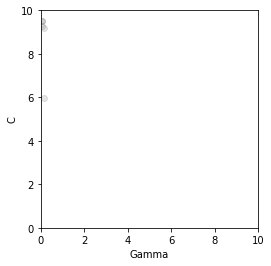

error of particle- 1 is (training, test) (30, 70)  At (gamma, c):  [0.06829775 9.50944679]
error of particle- 2 is (training, test) (31, 69)  At (gamma, c):  [0.0690364 9.2839427]
error of particle- 3 is (training, test) (23, 75)  At (gamma, c):  [0.12900938 9.1991439 ]
error of particle- 4 is (training, test) (33, 64)  At (gamma, c):  [0.04239213 9.5297206 ]


error of particle- 5 is (training, test) (24, 73)  At (gamma, c):  [0.16007522 5.95952145]


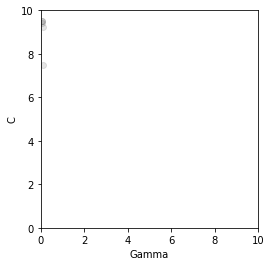

error of particle- 1 is (training, test) (32, 69)  At (gamma, c):  [0.05499846 9.51985485]
error of particle- 2 is (training, test) (32, 70)  At (gamma, c):  [0.05393917 9.42320586]
error of particle- 3 is (training, test) (24, 74)  At (gamma, c):  [0.11945412 9.23561177]
error of particle- 4 is (training, test) (33, 64)  At (gamma, c):  [0.04239213 9.5297206 ]


error of particle- 5 is (training, test) (27, 73)  At (gamma, c):  [0.10963868 7.48963492]


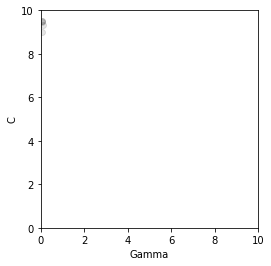

error of particle- 1 is (training, test) (33, 69)  At (gamma, c):  [0.049886   9.52385587]
error of particle- 2 is (training, test) (33, 69)  At (gamma, c):  [0.0513084  9.44747315]
error of particle- 3 is (training, test) (28, 72)  At (gamma, c):  [0.09301127 9.33653149]
error of particle- 4 is (training, test) (33, 64)  At (gamma, c):  [0.04239213 9.5297206 ]


error of particle- 5 is (training, test) (32, 69)  At (gamma, c):  [0.05990215 8.99851206]


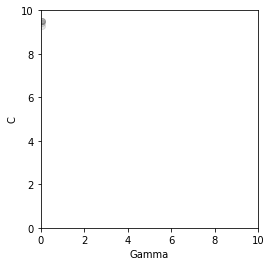

error of particle- 1 is (training, test) (33, 65)  At (gamma, c):  [0.04563914 9.52717948]
error of particle- 2 is (training, test) (33, 65)  At (gamma, c):  [0.04592255 9.49715452]
error of particle- 3 is (training, test) (30, 71)  At (gamma, c):  [0.07151804 9.41856091]
error of particle- 4 is (training, test) (33, 64)  At (gamma, c):  [0.04239213 9.5297206 ]


error of particle- 5 is (training, test) (33, 67)  At (gamma, c):  [0.05009813 9.29594059]


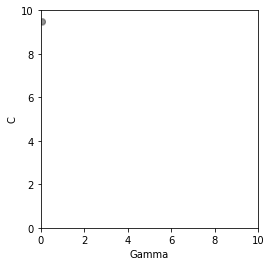

error of particle- 1 is (training, test) (33, 65)  At (gamma, c):  [0.04536858 9.52739122]
error of particle- 2 is (training, test) (33, 64)  At (gamma, c):  [0.04435776 9.5115888 ]
error of particle- 3 is (training, test) (31, 68)  At (gamma, c):  [0.06017051 9.46186899]
error of particle- 4 is (training, test) (33, 64)  At (gamma, c):  [0.04239213 9.5297206 ]
error of particle- 5 is (training, test) (33, 64)  At (gamma, c):  [0.04466635 9.46072642]
The best position is  [0.04239213 9.5297206 ] in iteration number 10 with error rate (train, test): (33, 64)


In [ ]:
random.seed(25)
particle_position_vector = np.array([np.array([random.random(), random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = np.array([float('inf'), float('inf')])
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    plot(particle_position_vector)
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print("error of particle-",i+1,"is (training, test)", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i])

        
        if(pbest_fitness_value[i] > fitness_cadidate[1]):
            pbest_fitness_value[i] = fitness_cadidate[1]
            pbest_position[i] = particle_position_vector[i]
            
        if(gbest_fitness_value[1] > fitness_cadidate[1]):
              gbest_fitness_value = fitness_cadidate
              gbest_position = particle_position_vector[i]
              
        elif(gbest_fitness_value[1] == fitness_cadidate[1] and gbest_fitness_value[0] > fitness_cadidate[0]):
              gbest_fitness_value = fitness_cadidate
              gbest_position = particle_position_vector[i]
                

    for i in range(n_particles):
      max_velocity = np.array([1,10])
      min_velocity = np.array([-1,-100])
      max_position = np.array([1,10])
      min_position = np.array([0.0001, 0.001])
      new_velocity = W*(velocity_vector[i] + ((c1*random.random()) * (pbest_position[i] - particle_position_vector[i])) + 
                          ((c2*random.random()) * (gbest_position - particle_position_vector[i])))
        
      for j in range(0,len(new_velocity)):
        if(new_velocity[j] > max_velocity[j]):
          new_velocity[j] = max_velocity[j]
        elif(new_velocity[j] < min_velocity[j]):
          new_velocity[j] = min_velocity[j]
            
      new_position = new_velocity + particle_position_vector[i]
      particle_position_vector[i] = new_position
        
      for j in range(0,2):
        if(particle_position_vector[i][j] > max_position[j]):
          particle_position_vector[i][j] = max_position[j]
        elif(particle_position_vector[i][j] < min_position[j]):
          particle_position_vector[i][j] = min_position[j]

    iteration = iteration + 1
print("The best position is ", gbest_position, "in iteration number", iteration, "with error rate (train, test):", fitness_function(gbest_position))

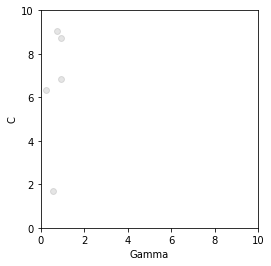

error of particle- 1 is (training, test) (7, 75)  At (gamma, c):  [0.90563968 6.86254157]
error of particle- 2 is (training, test) (7, 77)  At (gamma, c):  [0.76650926 9.04616238]
error of particle- 3 is (training, test) (15, 74)  At (gamma, c):  [0.25982745 6.3572587 ]
error of particle- 4 is (training, test) (7, 75)  At (gamma, c):  [0.90494569 8.72130374]


error of particle- 5 is (training, test) (21, 69)  At (gamma, c):  [0.57294067 1.69378087]


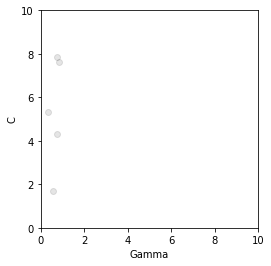

error of particle- 1 is (training, test) (7, 74)  At (gamma, c):  [0.74031522 4.29408614]
error of particle- 2 is (training, test) (6, 77)  At (gamma, c):  [0.7356216  7.87294599]
error of particle- 3 is (training, test) (14, 75)  At (gamma, c):  [0.33018411 5.30937347]
error of particle- 4 is (training, test) (7, 75)  At (gamma, c):  [0.85233884 7.60777875]


error of particle- 5 is (training, test) (21, 69)  At (gamma, c):  [0.57294067 1.69378087]


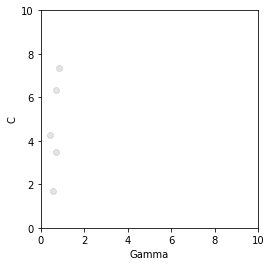

error of particle- 1 is (training, test) (7, 73)  At (gamma, c):  [0.68778607 3.47800135]
error of particle- 2 is (training, test) (7, 76)  At (gamma, c):  [0.69559285 6.35252044]
error of particle- 3 is (training, test) (14, 74)  At (gamma, c):  [0.39975934 4.27312665]
error of particle- 4 is (training, test) (7, 76)  At (gamma, c):  [0.83913379 7.3282685 ]


error of particle- 5 is (training, test) (21, 69)  At (gamma, c):  [0.57294067 1.69378087]


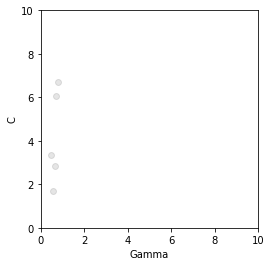

error of particle- 1 is (training, test) (7, 71)  At (gamma, c):  [0.64815006 2.86222242]
error of particle- 2 is (training, test) (7, 76)  At (gamma, c):  [0.68837496 6.07836086]
error of particle- 3 is (training, test) (14, 73)  At (gamma, c):  [0.46087362 3.36289653]
error of particle- 4 is (training, test) (7, 76)  At (gamma, c):  [0.80989705 6.70941691]


error of particle- 5 is (training, test) (21, 69)  At (gamma, c):  [0.57294067 1.69378087]


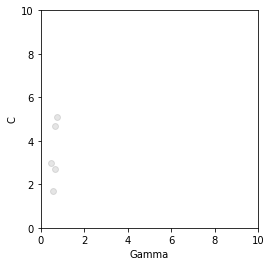

error of particle- 1 is (training, test) (7, 71)  At (gamma, c):  [0.6368406  2.68652032]
error of particle- 2 is (training, test) (7, 75)  At (gamma, c):  [0.65103927 4.66022643]
error of particle- 3 is (training, test) (14, 73)  At (gamma, c):  [0.48594238 2.98952491]
error of particle- 4 is (training, test) (7, 75)  At (gamma, c):  [0.7342285  5.10774711]


error of particle- 5 is (training, test) (21, 69)  At (gamma, c):  [0.57294067 1.69378087]


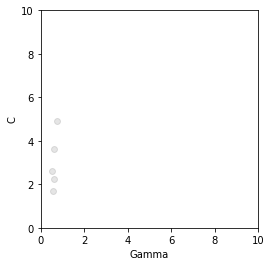

error of particle- 1 is (training, test) (12, 73)  At (gamma, c):  [0.60716438 2.22547513]
error of particle- 2 is (training, test) (7, 73)  At (gamma, c):  [0.62410295 3.63709509]
error of particle- 3 is (training, test) (15, 73)  At (gamma, c):  [0.51118761 2.61352494]
error of particle- 4 is (training, test) (7, 75)  At (gamma, c):  [0.72484571 4.90914224]


error of particle- 5 is (training, test) (21, 69)  At (gamma, c):  [0.57294067 1.69378087]


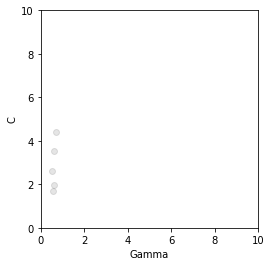

error of particle- 1 is (training, test) (14, 72)  At (gamma, c):  [0.59017855 1.96158601]
error of particle- 2 is (training, test) (7, 72)  At (gamma, c):  [0.62116543 3.5255183 ]
error of particle- 3 is (training, test) (15, 73)  At (gamma, c):  [0.51124936 2.61260529]
error of particle- 4 is (training, test) (7, 74)  At (gamma, c):  [0.70089585 4.40219756]


error of particle- 5 is (training, test) (21, 69)  At (gamma, c):  [0.57294067 1.69378087]


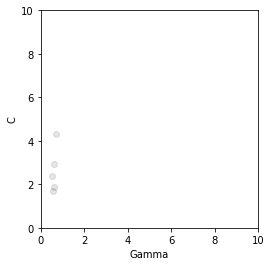

error of particle- 1 is (training, test) (17, 72)  At (gamma, c):  [0.58360301 1.85942929]
error of particle- 2 is (training, test) (7, 71)  At (gamma, c):  [0.60507416 2.91431804]
error of particle- 3 is (training, test) (14, 73)  At (gamma, c):  [0.52529103 2.40346998]
error of particle- 4 is (training, test) (7, 74)  At (gamma, c):  [0.69621894 4.30320181]


error of particle- 5 is (training, test) (21, 69)  At (gamma, c):  [0.57294067 1.69378087]


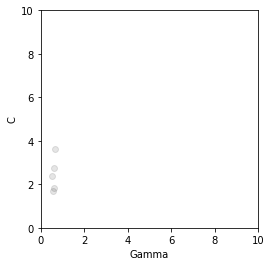

error of particle- 1 is (training, test) (17, 72)  At (gamma, c):  [0.58314496 1.85231318]
error of particle- 2 is (training, test) (11, 71)  At (gamma, c):  [0.60023792 2.73062173]
error of particle- 3 is (training, test) (14, 73)  At (gamma, c):  [0.52593774 2.39383791]
error of particle- 4 is (training, test) (7, 74)  At (gamma, c):  [0.66499008 3.64218303]


error of particle- 5 is (training, test) (21, 69)  At (gamma, c):  [0.57294067 1.69378087]


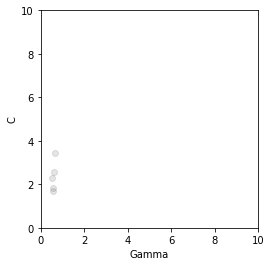

error of particle- 1 is (training, test) (17, 71)  At (gamma, c):  [0.58045461 1.81051626]
error of particle- 2 is (training, test) (12, 72)  At (gamma, c):  [0.59597828 2.56882616]
error of particle- 3 is (training, test) (15, 73)  At (gamma, c):  [0.5324016 2.2975658]
error of particle- 4 is (training, test) (7, 71)  At (gamma, c):  [0.6549566 3.4298053]
error of particle- 5 is (training, test) (21, 69)  At (gamma, c):  [0.57294067 1.69378087]
The best position is  [0.57294067 1.69378087] in iteration number 10 with error rate (train, test): (21, 69)


In [ ]:
random.seed(20)
particle_position_vector = np.array([np.array([random.random(), random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = np.array([float('inf'), float('inf')])
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    plot(particle_position_vector)
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print("error of particle-",i+1,"is (training, test)", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i])

        
        if(pbest_fitness_value[i] > fitness_cadidate[1]):
            pbest_fitness_value[i] = fitness_cadidate[1]
            pbest_position[i] = particle_position_vector[i]
            
            if(gbest_fitness_value[1] > fitness_cadidate[1]):
              gbest_fitness_value = fitness_cadidate
              gbest_position = particle_position_vector[i]
              
              if(gbest_fitness_value[1] == fitness_cadidate[1] and gbest_fitness_value[0] > fitness_cadidate[0]):
                gbest_fitness_value = fitness_cadidate
                gbest_position = particle_position_vector[i]
                

    for i in range(n_particles):
        new_velocity = W*(velocity_vector[i] + ((c1*random.random()) * (pbest_position[i] - particle_position_vector[i])) + 
                          ((c2*random.random()) * (gbest_position - particle_position_vector[i])))
        
            
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
        

    iteration = iteration + 1
print("The best position is ", gbest_position, "in iteration number", iteration, "with error rate (train, test):", fitness_function(gbest_position))

In [ ]:
random.seed(12345)
particle_position_vector = np.array([np.array([random.random(), random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = np.array([float('inf'), float('inf')])
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    plot(particle_position_vector)
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print("error of particle-",i+1,"is (training, test)", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i])

        
        if(pbest_fitness_value[i] > fitness_cadidate[1]):
            pbest_fitness_value[i] = fitness_cadidate[1]
            pbest_position[i] = particle_position_vector[i]
            
            if(gbest_fitness_value[1] > fitness_cadidate[1]):
              gbest_fitness_value = fitness_cadidate
              gbest_position = particle_position_vector[i]
              
              if(gbest_fitness_value[1] == fitness_cadidate[1] and gbest_fitness_value[0] > fitness_cadidate[0]):
                gbest_fitness_value = fitness_cadidate
                gbest_position = particle_position_vector[i]
                

    for i in range(n_particles):
        #max_velocity = np.array([1,10])
        #min_velocity = np.array([-1,-100])
        #max_position = np.array([1,10])
        #min_position = np.array([0.01, 0.1])
        new_velocity = W*(velocity_vector[i] + ((c1*random.random()) * (pbest_position[i] - particle_position_vector[i])) + 
                          ((c2*random.random()) * (gbest_position - particle_position_vector[i])))
        
        #for j in range(0,len(new_velocity)):
            #if(new_velocity[j] > max_velocity[j]):
                #new_velocity[j] = max_velocity[j]
            #elif(new_velocity[j] < min_velocity[j]):
                #new_velocity[j] = min_velocity[j]
            
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
        
        #for j in range(0,2):
            #if(particle_position_vector[i][j] > max_position[j]):
                ##particle_position_vector[i][j] = max_position[j]
            #elif(particle_position_vector[i][j] < min_position[j]):
                #particle_position_vector[i][j] = min_position[j]

    iteration = iteration + 1
print("The best position is ", gbest_position, "in iteration number", iteration, "with error rate (train, test):", fitness_function(gbest_position))

In [ ]:
random.seed(1)
particle_position_vector = np.array([np.array([random.random()*10, random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = np.array([float('inf'), float('inf')])
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    plot(particle_position_vector)
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print("error of particle-",i,"is (training, test)", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate[0]):
            pbest_fitness_value[i] = fitness_cadidate[0]
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value[1] > fitness_cadidate[1]):
            gbest_fitness_value[i] = fitness_cadidate[1]
            gbest_position = particle_position_vector[i]

        elif(gbest_fitness_value[1] == fitness_cadidate[1] and gbest_fitness_value[0] > fitness_cadidate[0]):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
            
    for i in range(n_particles):
      #new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
      new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])                                                                                                                                      
      new_position = new_velocity + particle_position_vector[i]
      particle_position_vector[i] = new_position.round(2)
        
    iteration = iteration + 1
    
print("The best position is ", gbest_position, "in iteration number", iteration, "with error (train, test):", fitness_function(gbest_position))

In [ ]:

random.seed(5)
print(random.random())

0.6229016948897019


# **SVM-PSO Baru**

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [ ]:
population = 100
dimension = 2
position_min = -100.0
position_max = 100.0
generation = 400
fitness_criterion = 10e-4

In [ ]:
def fitness_function(position):
  svclassifier = SVC(kernel='rbf', gamma = position[0], C = position[1] )  
  svclassifier.fit(Train_X_Tfidf,Train_Y)
  y_train_pred = svclassifier.predict(Train_X_Tfidf)
  y_test_pred = svclassifier.predict(Test_X_Tfidf)   
  return confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0], confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0]

In [ ]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
  # Initialise new velocity array
  num_particle = len(particle)
  new_velocity = np.array([0.0 for i in range(num_particle)])
  # Randomly generate r1, r2 and inertia weight from normal distribution
  r1 = random.uniform(0,max)
  r2 = random.uniform(0,max)
  w = random.uniform(w_min,max)
  c1 = c
  c2 = c
  # Calculate new velocity
  for i in range(num_particle):
    new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity

In [ ]:
def update_position(particle, velocity):
  # Move particles by adding velocity
  new_particle = particle + velocity
  return new_particle

In [ ]:
def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
  # Initialisation
  # Population
  #particle_position_vector = np.array([np.array([random.random()*10, random.random()*10]) for _ in range(n_particles)])
  particles = np.array([np.array([random.uniform(position_min, position_max)]) for j in range(dimension) for i in range(population)])
  #[[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Particle's best position
  pbest_position = particles
  # Fitness
  #a = np.array([float('inf'), float('inf')]
  for p in particles :
    x = np.array([fitness_function(p[0],p[1])])
    pbest_fitness = p.append(x)
  #pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
  
  # Index of the best particle
  gbest_index = np.argmin(pbest_fitness)
  # Global best particle position
  gbest_position = pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity = [[0.0 for j in range(dimension)] for i in range(population)]

  # Loop for the number of generation
  for t in range(generation):
    # Stop if the average fitness value reached a predefined success criterion
    if np.average(pbest_fitness) <= fitness_criterion:
      break
    else:
      for n in range(population):
        # Update the velocity of each particle
        velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
        # Move the particles to new position
        particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
    # Find the index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]

  # Print the results
  print('Global Best Position: ', gbest_position)
  print('Best Fitness Value: ', min(pbest_fitness))
  print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
  print('Number of Generation: ', t)

In [ ]:
pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)

IndexError: ignored

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
#GAMMA C
#7.77 3.92
SVM = svm.SVC(C= 0.9, kernel='rbf', gamma=0.6)
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Confusion Matrix: ")
print(confusion_matrix(Test_Y, predictions_SVM))
print()
print("Classifiction Report :")
print(classification_report(Test_Y, predictions_SVM))

Confusion Matrix: 
[[ 61  83]
 [ 17 265]]

Classifiction Report :
              precision    recall  f1-score   support

           0       0.78      0.42      0.55       144
           1       0.76      0.94      0.84       282

    accuracy                           0.77       426
   macro avg       0.77      0.68      0.70       426
weighted avg       0.77      0.77      0.74       426



# **SVM-PSO**


In [ ]:
import math

In [ ]:
#berdasarkan paper
K = 0.3
c1 = 2.05
c2 = 2.05
c = c1 + c2
khi = 2*K/(abs(2-c-math.sqrt(c**2-4*c)))
n_iterations = 10
n_particles = 100

In [ ]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
def fitness_function(position):
    kf = KFold(n_splits = 3)
    svclassifier = SVC(kernel='rbf', gamma = position[0], C = position[1] )  
   # svclassifier.fit(X_train, y_train)
    scores = cross_val_score(svclassifier, X, y, cv = kf, scoring = 'roc_auc')
    return np.mean(scores)
   # y_train_pred = svclassifier.predict(X_train)
   # y_test_pred = svclassifier.predict(X_test)   
   # return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))
